# Using AHPTree from `pyanp`

## First we import

In [5]:
import pandas as pd
import re
import sys 
import os
sys.path.insert(0, os.path.abspath("../"))
from pyanp.ahptree import AHPTree, ahptree_fromdf

In [6]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [7]:
pylab.rcParams['figure.figsize'] = (12, 7.5)

# Example model 

## Read in the data and verify it looks right

In [8]:
excel_file = '../tests/data/CleanedNish.xlsx'
ahp = ahptree_fromdf(excel_file)

In [13]:
ahp

## Look at global priorities

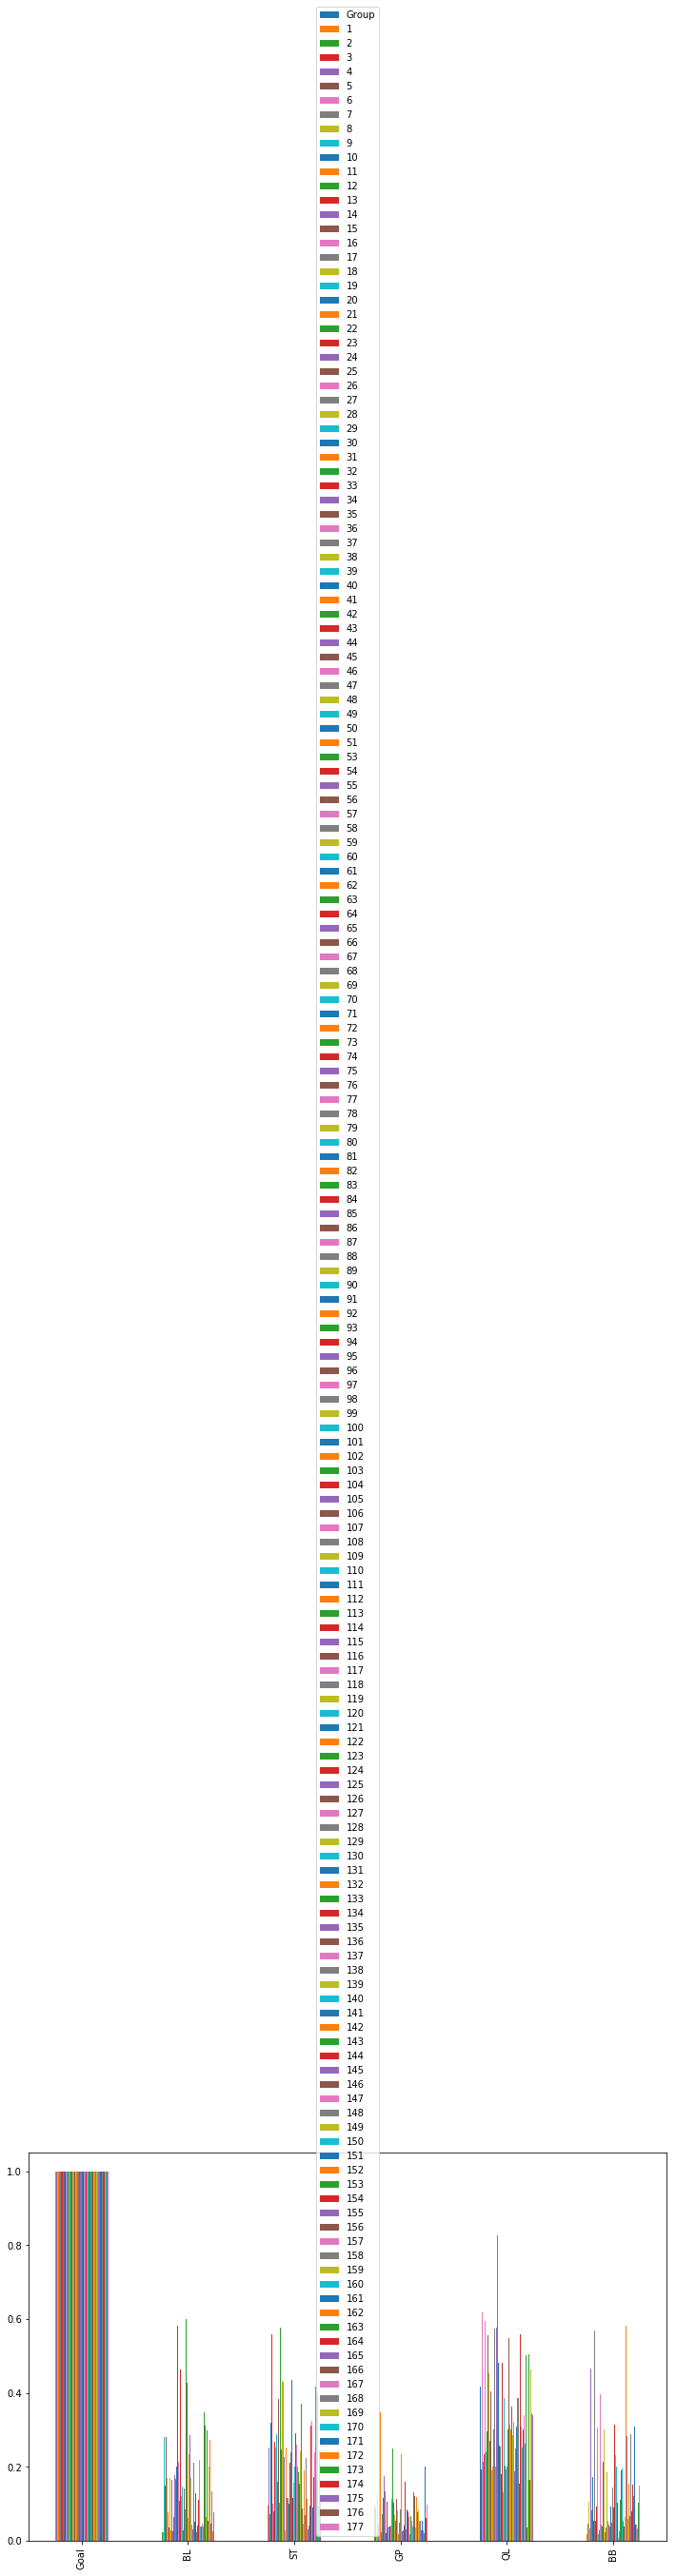

In [19]:
gs = ahp.global_priority_table()
gs.plot(kind="bar")

### More detailed analysis
Working with Nischay *online* **10/7/18**

In [26]:
gs.iloc[:,[0, 1, 2, 3]]

,Group,1,2,3
Goal,1.000000,1.000000,1.000000,1.000000
BL,0.130873,0.584217,0.023496,0.041512
ST,0.219789,0.094357,0.023496,0.528439
GP,0.090020,0.045262,0.097561,0.119929
QL,0.418334,0.256830,0.606950,0.193336
BB,0.140984,0.019333,0.248497,0.116784


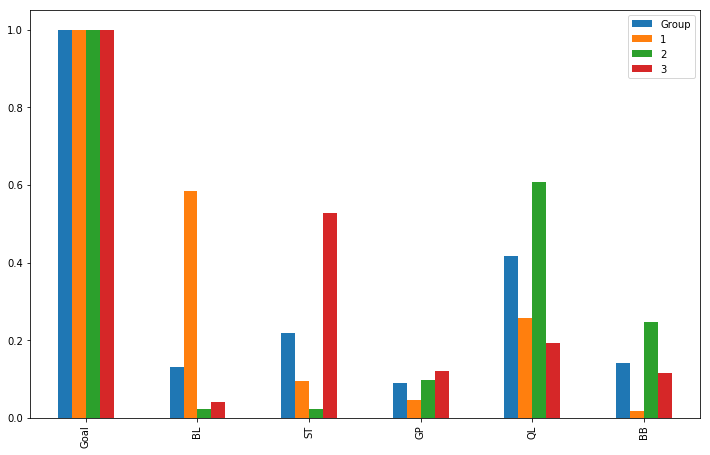

In [27]:
first4PlusGroup = gs.iloc[:,[0, 1, 2, 3]]
first4PlusGroup.plot(kind="bar")

In [31]:
gs.shape[0]

6

/home/adams/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


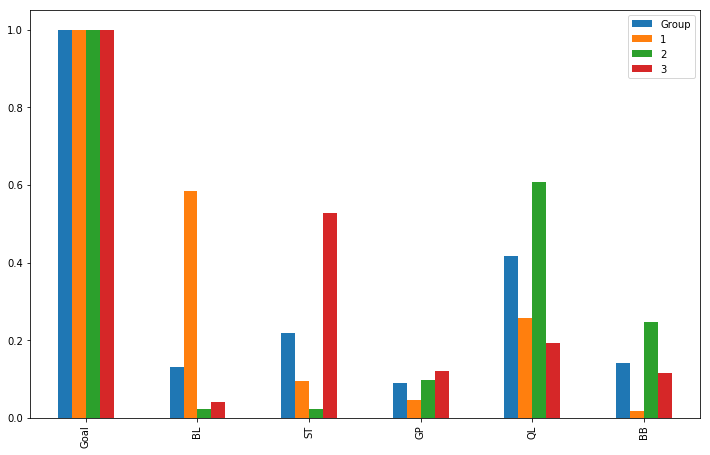

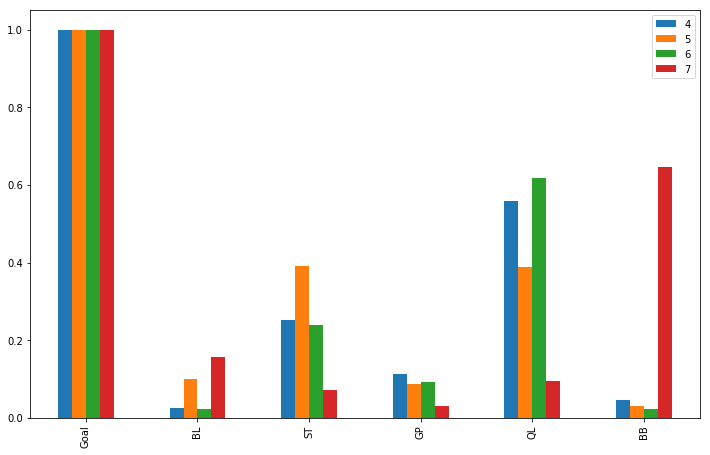

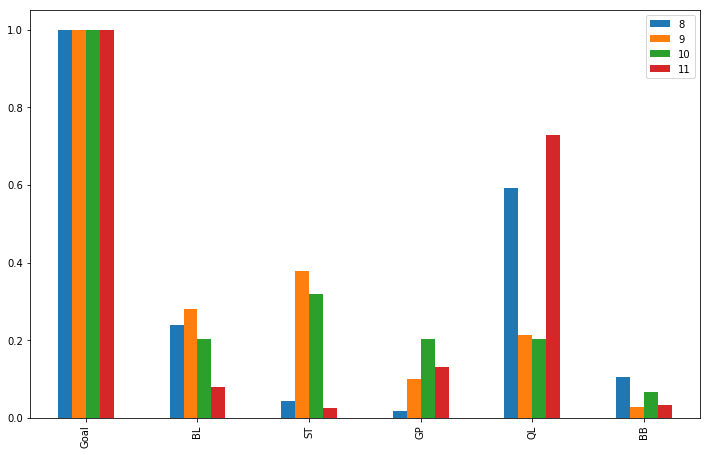

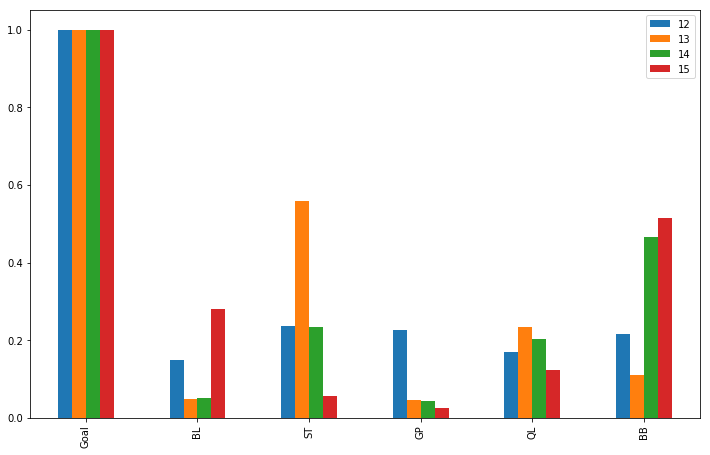

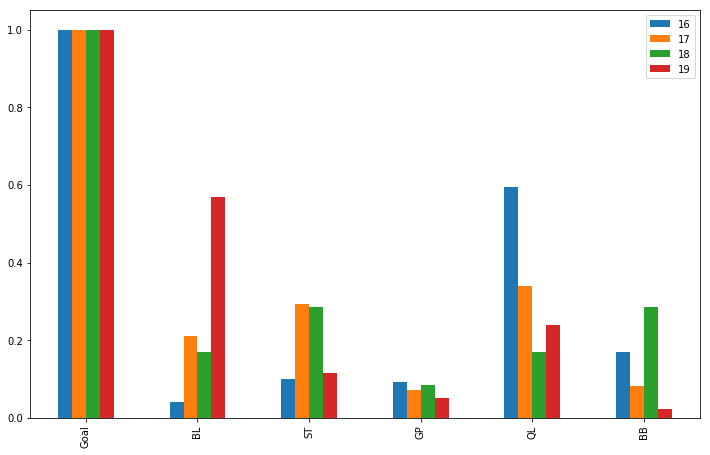

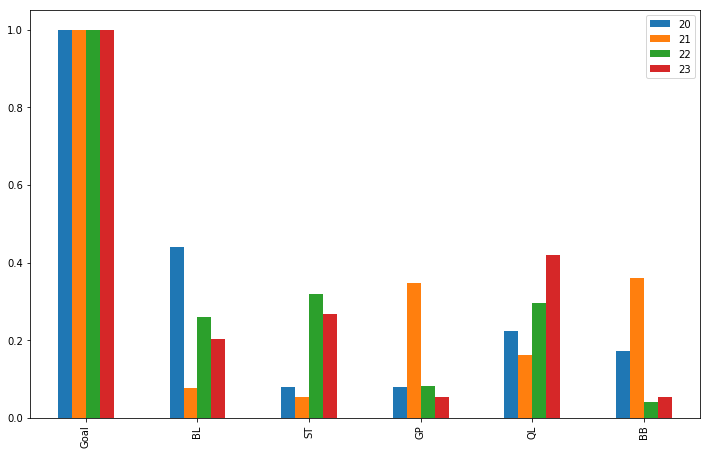

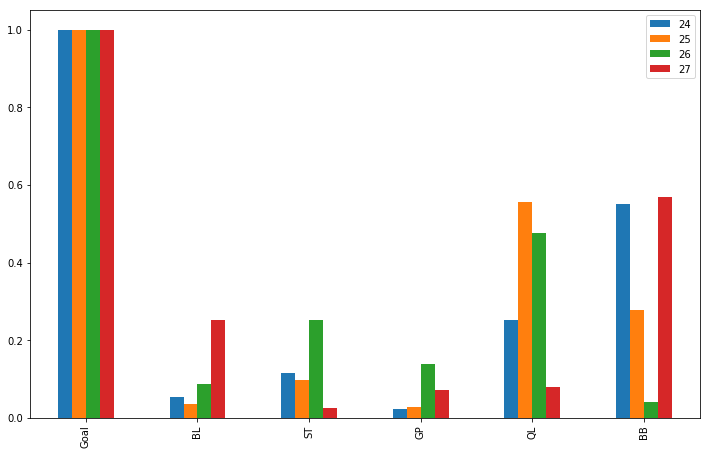

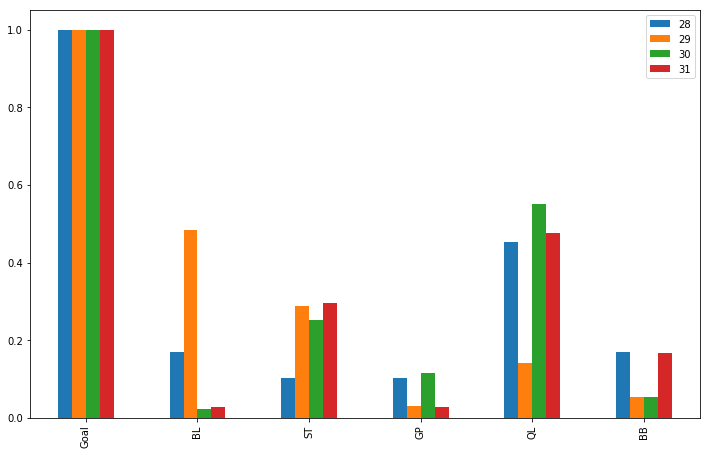

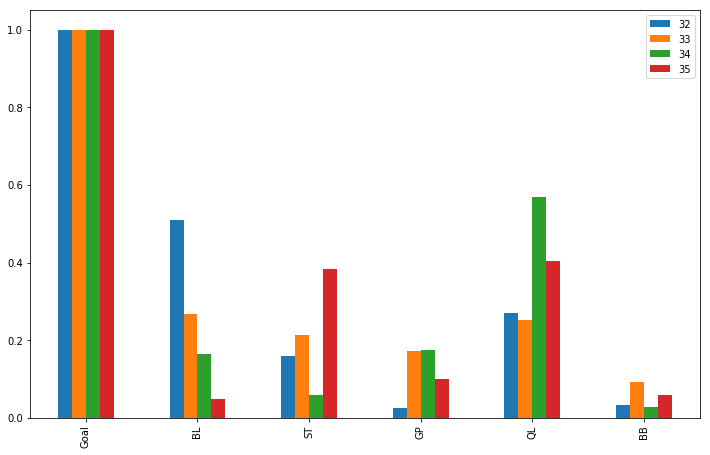

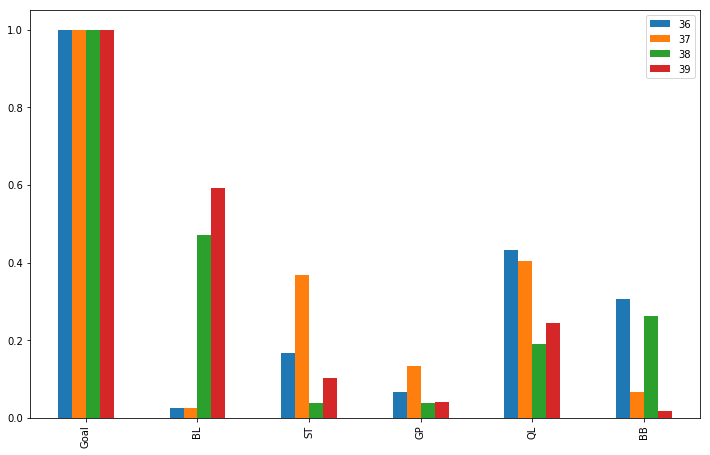

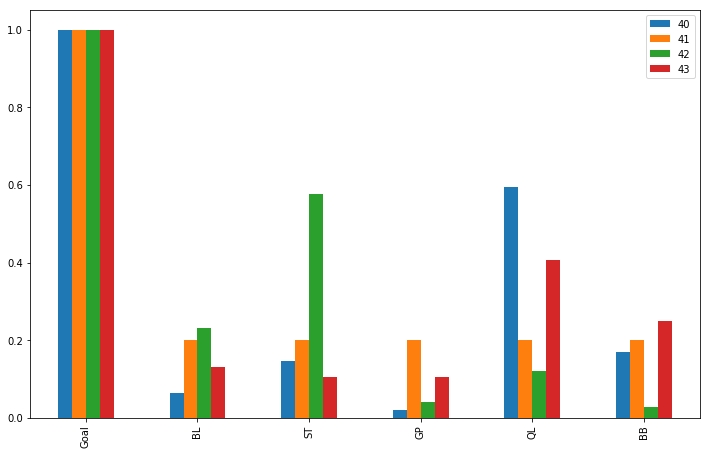

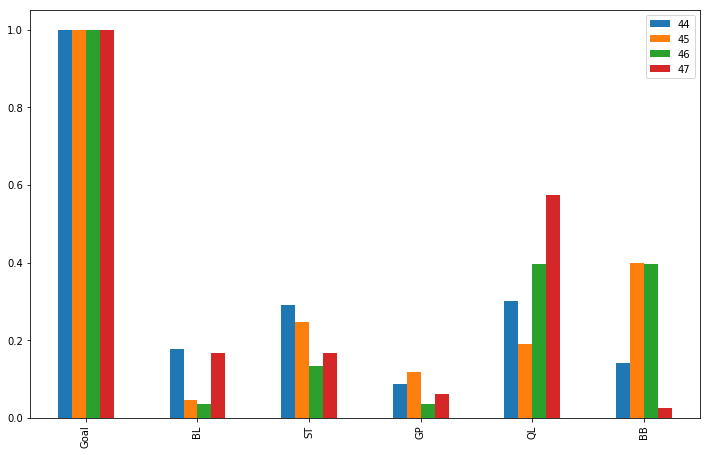

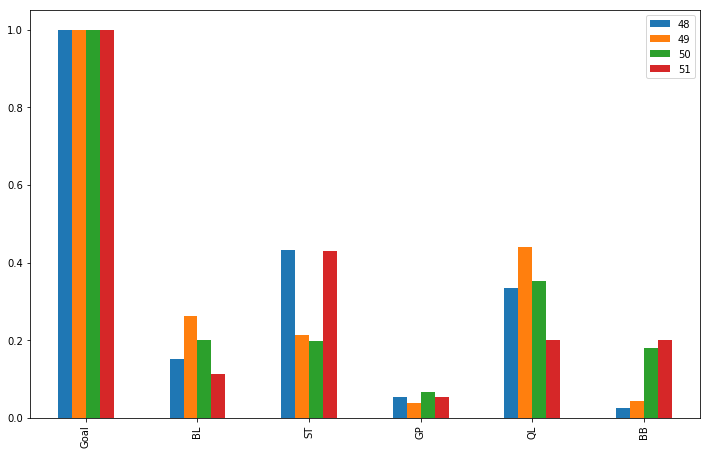

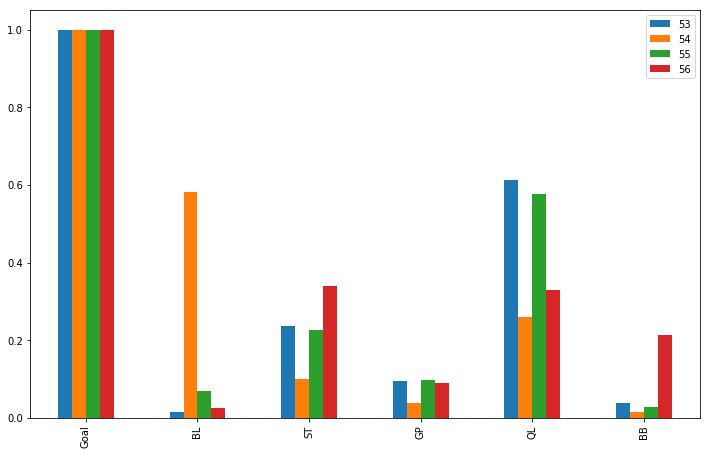

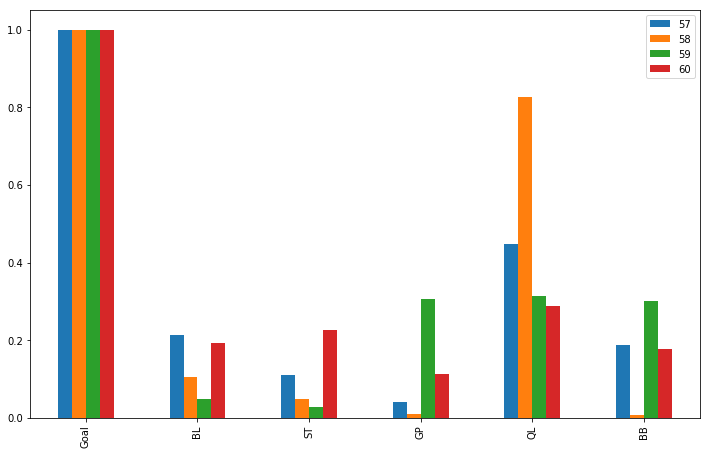

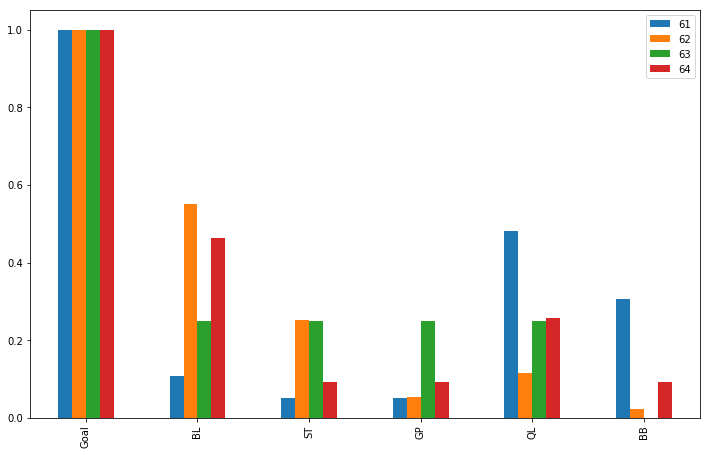

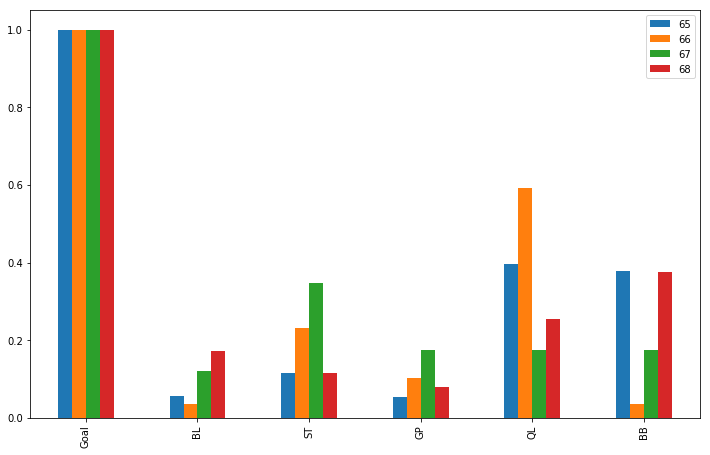

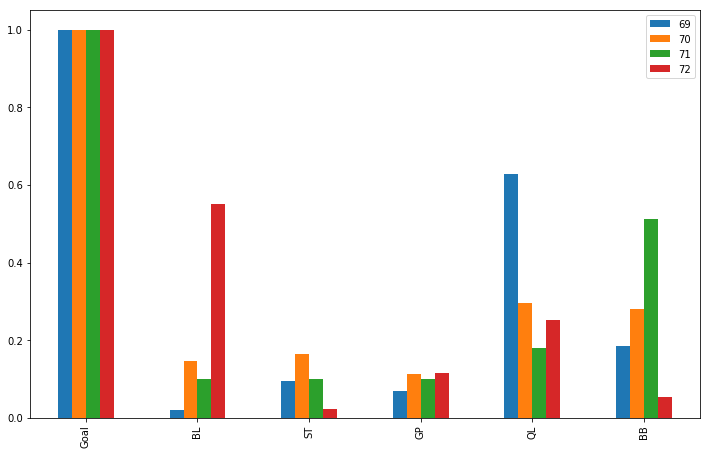

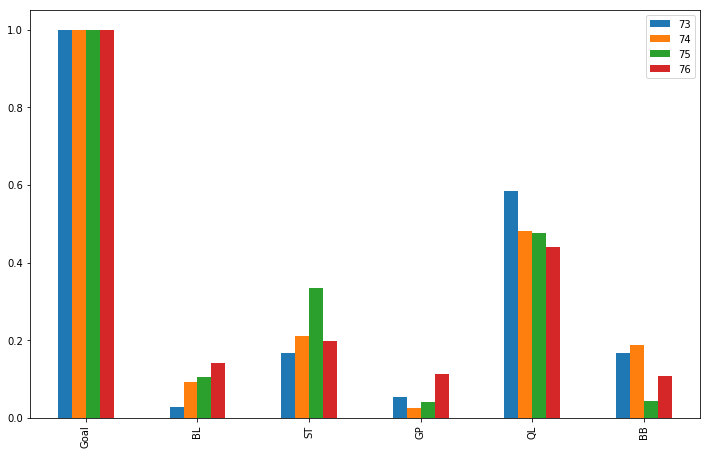

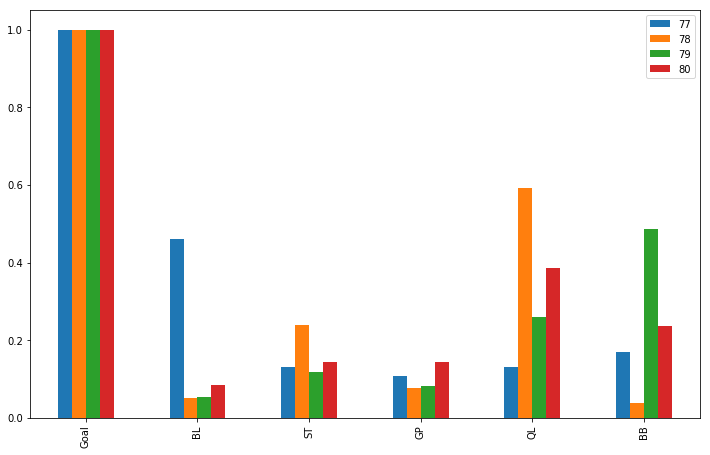

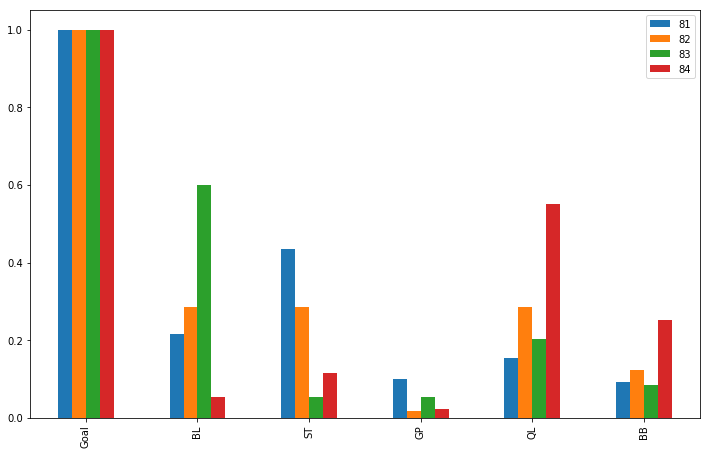

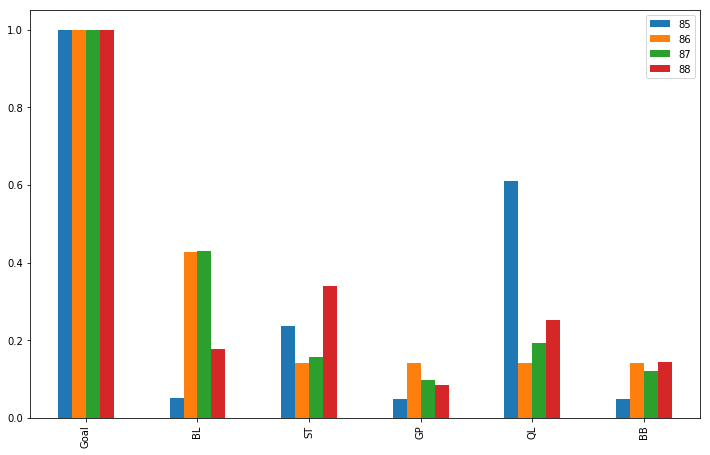

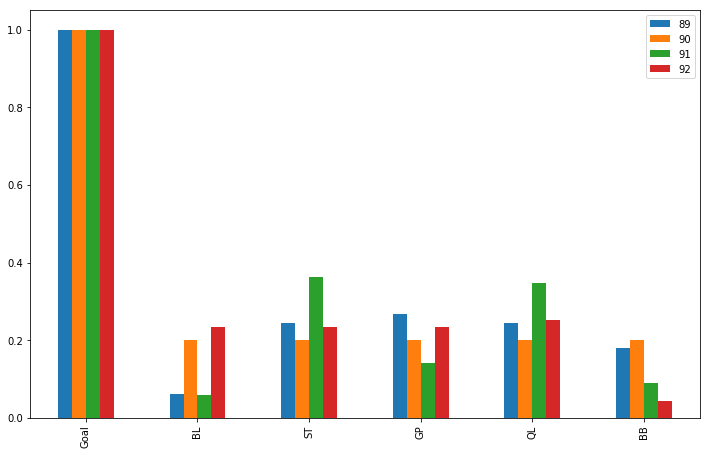

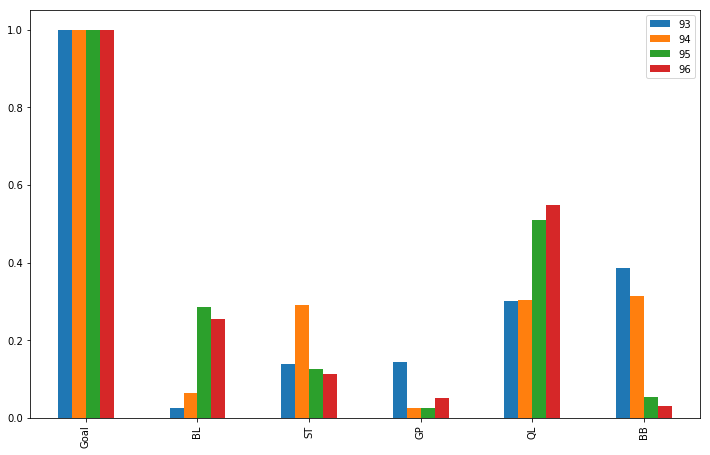

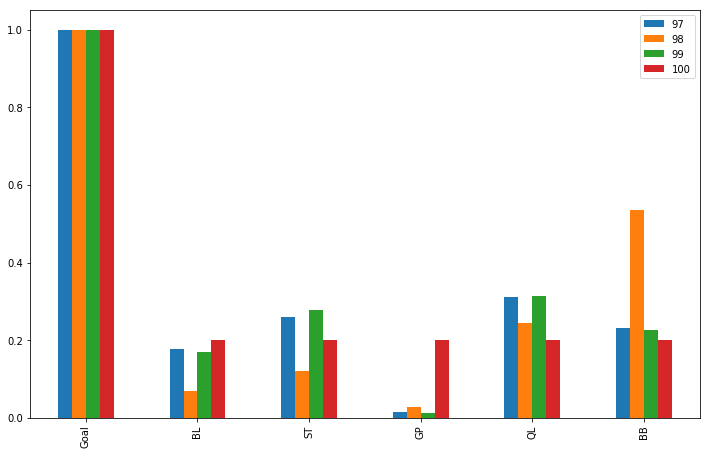

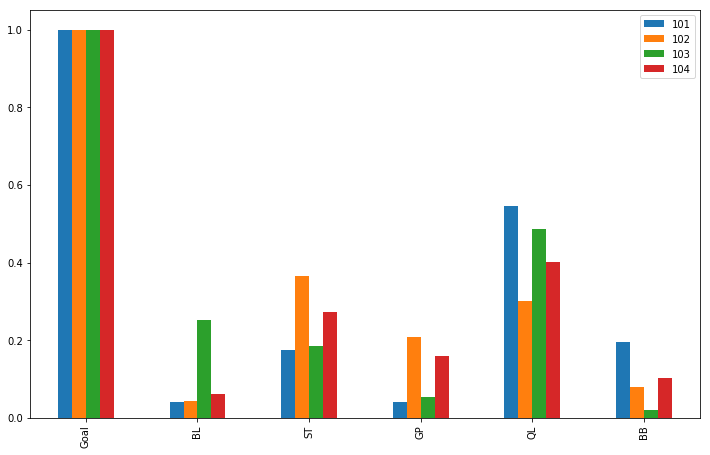

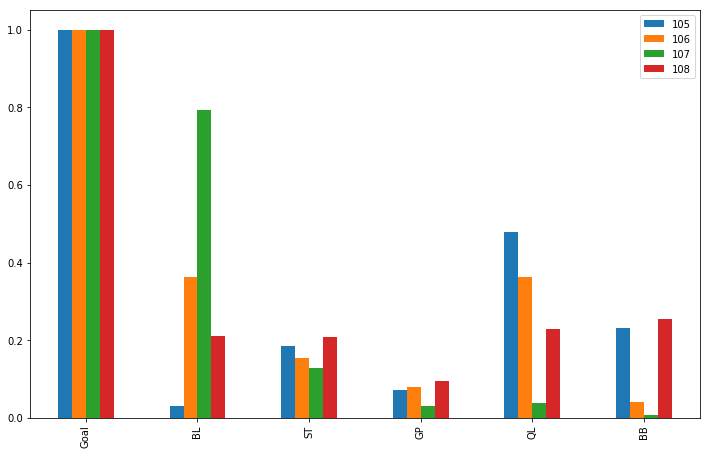

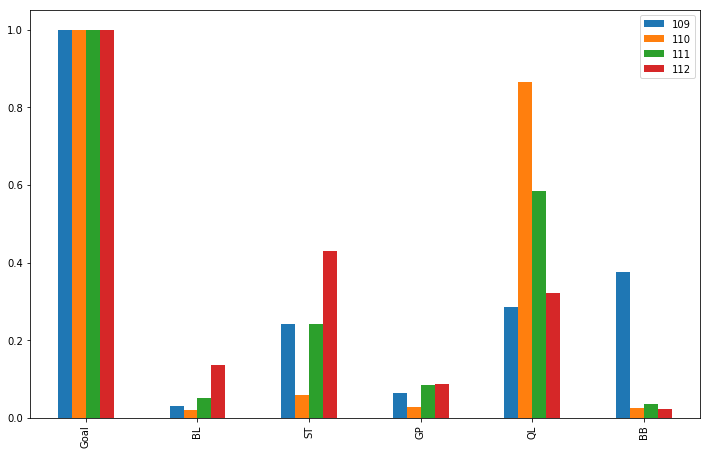

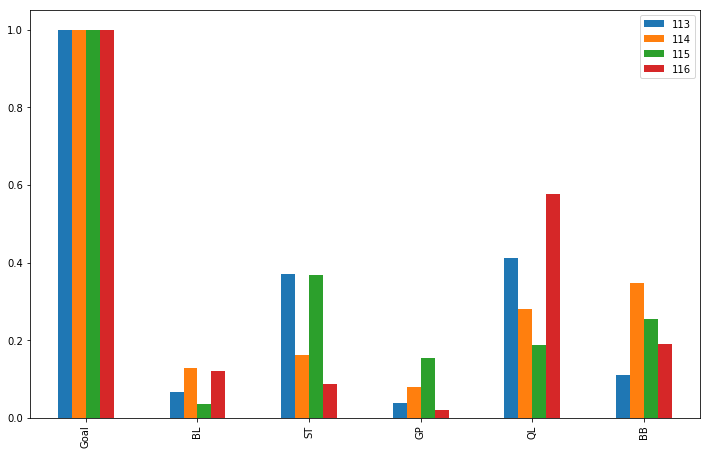

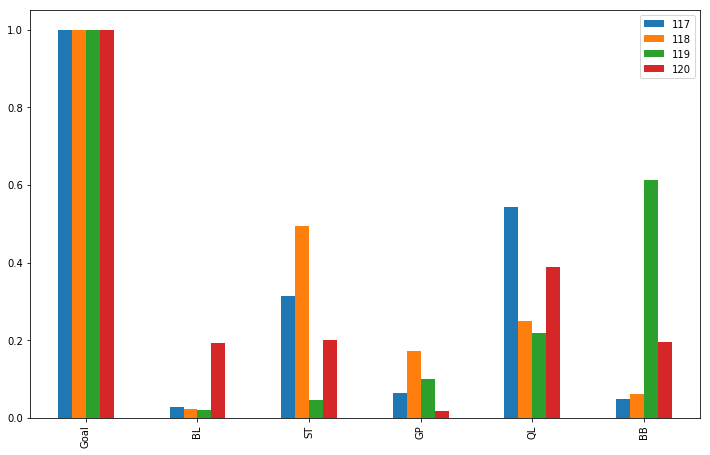

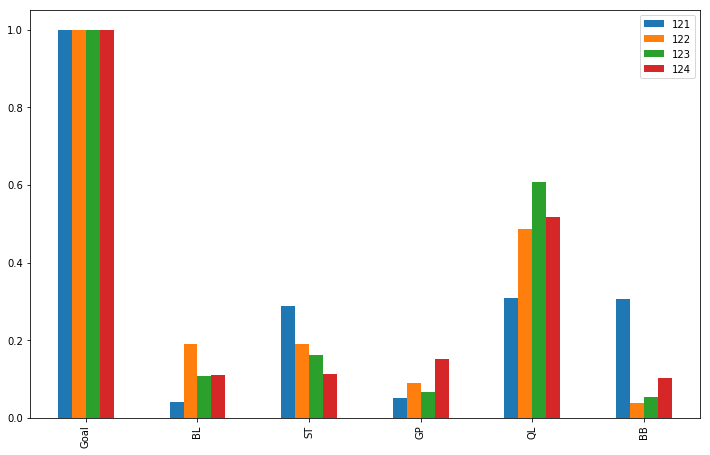

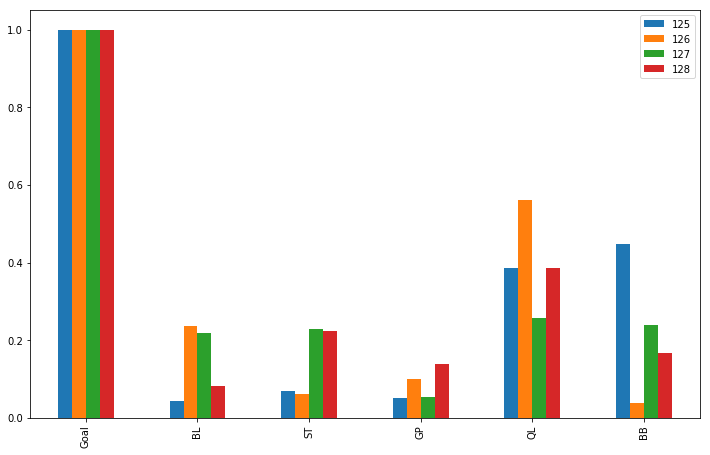

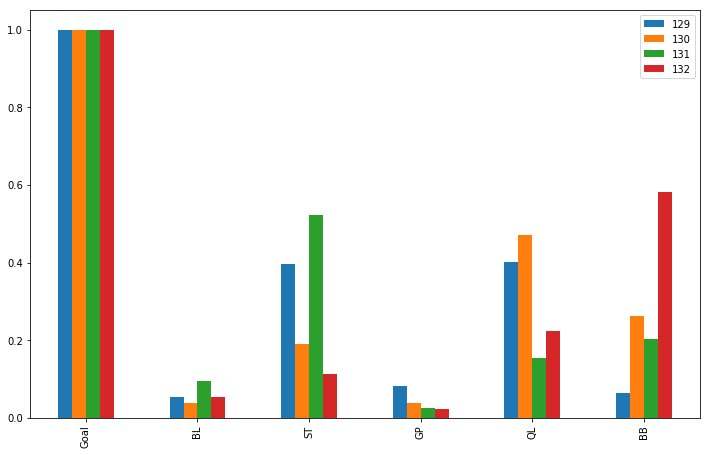

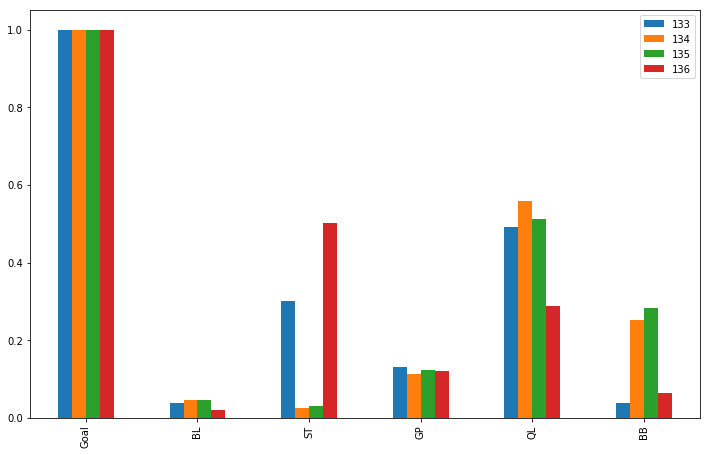

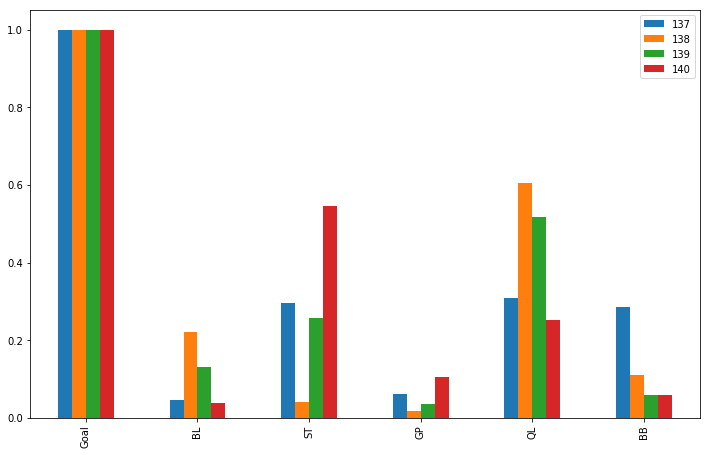

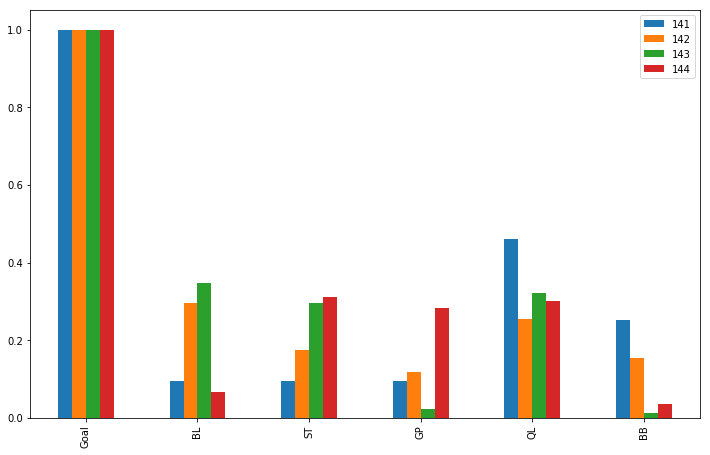

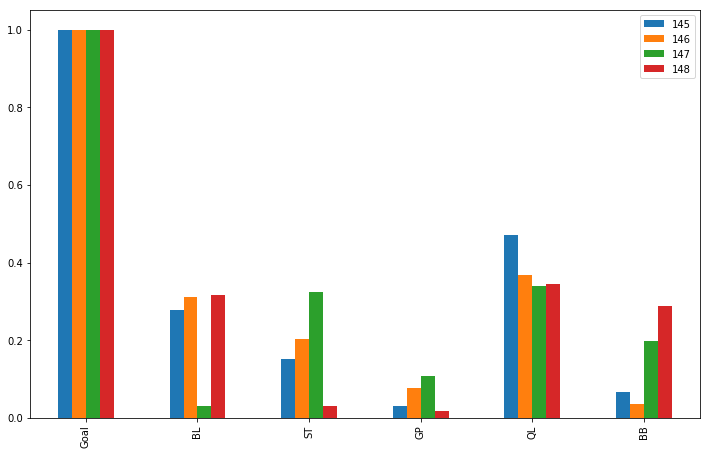

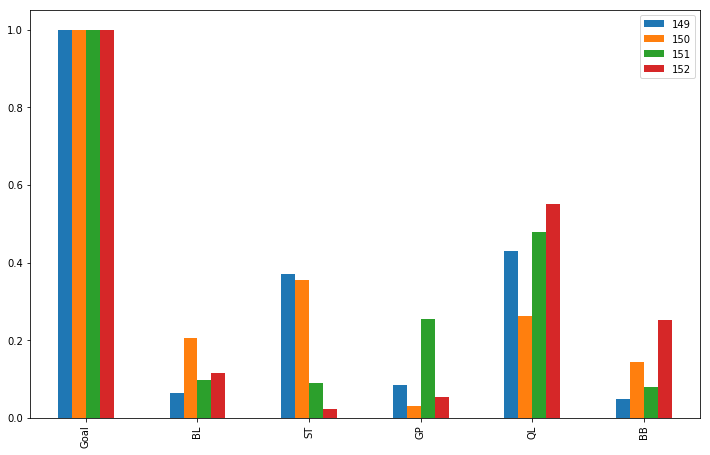

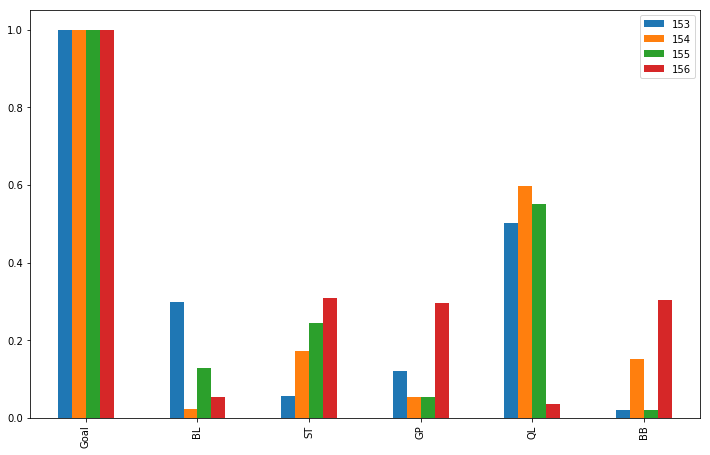

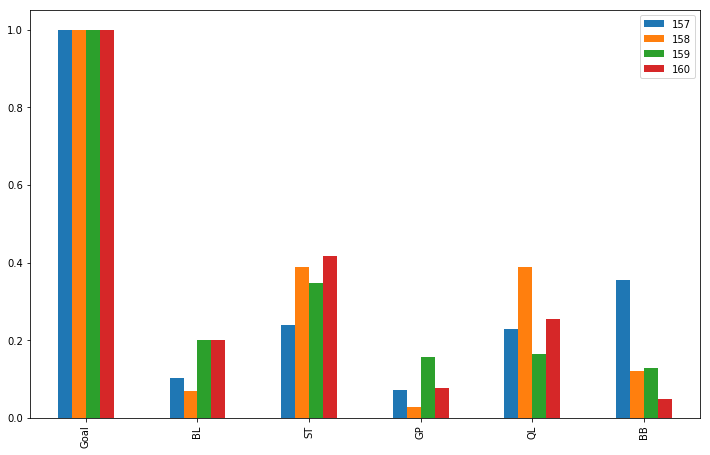

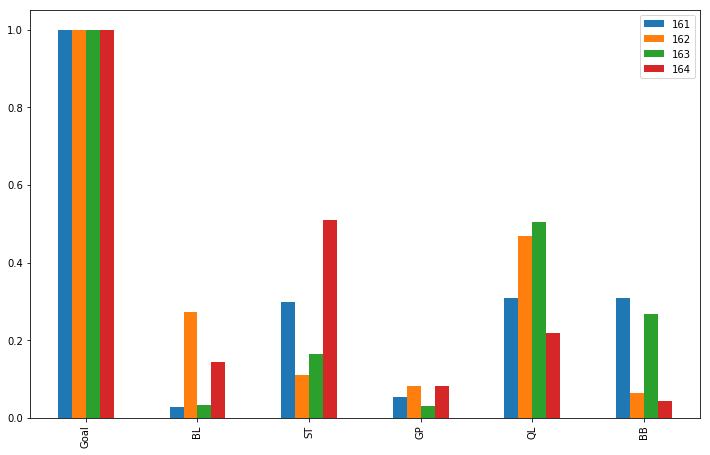

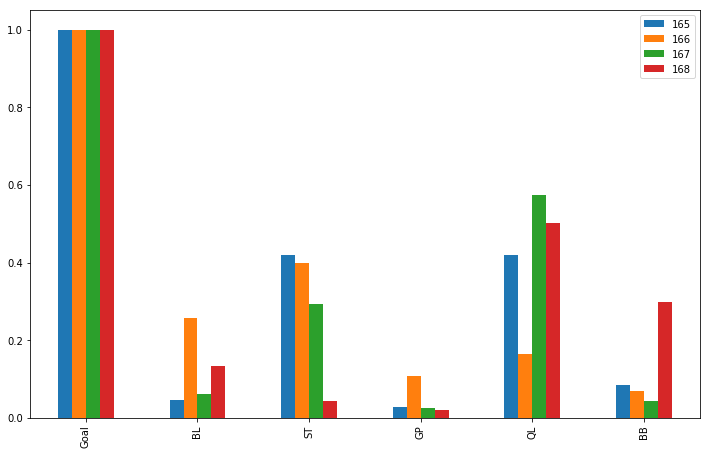

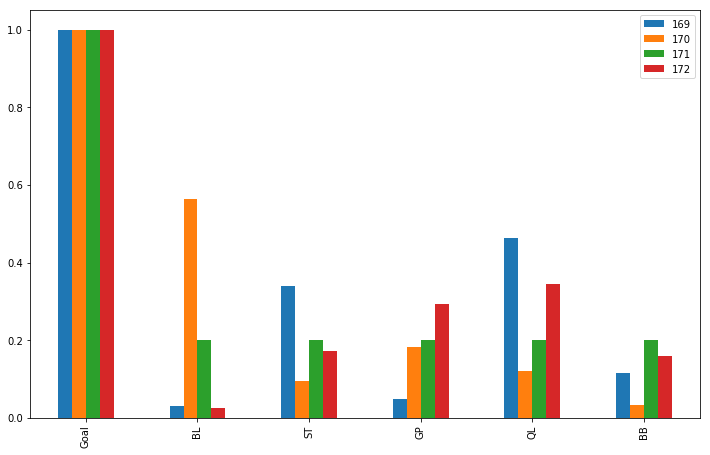

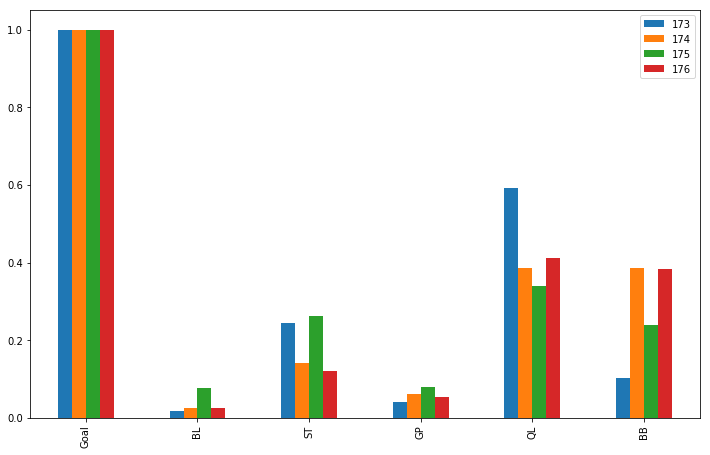

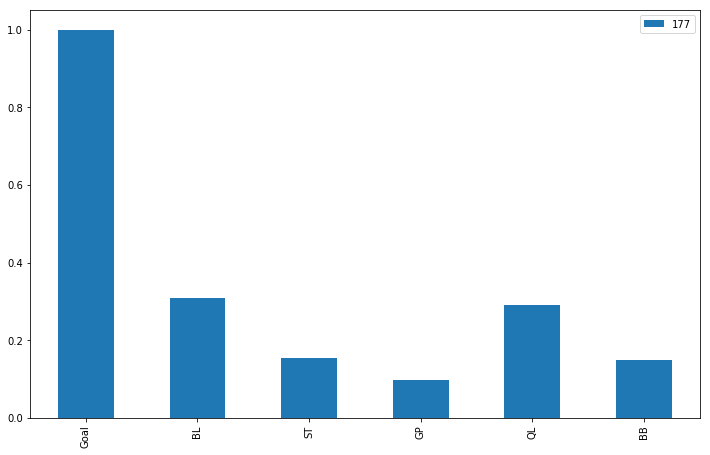

In [33]:
for i in range(0, gs.shape[1], 4):
    gs.iloc[:, i:(i+4)].plot(kind="bar")

## Alternative scores

,Group,1,2,3,4,5,6,7,8,9,...,168,169,170,171,172,173,174,175,176,177
T,0.577751,0.330992,0.575389,0.698863,0.648973,0.64423,0.64831,0.475621,0.481029,0.551912,...,0.515153,0.655739,0.34923,0.54,0.630386,0.641181,0.585052,0.604015,0.579896,0.473418
W,0.422249,0.669008,0.424611,0.301137,0.351027,0.35577,0.35169,0.524379,0.518971,0.448088,...,0.484847,0.344261,0.65077,0.46,0.369614,0.358819,0.414948,0.395985,0.420104,0.526582


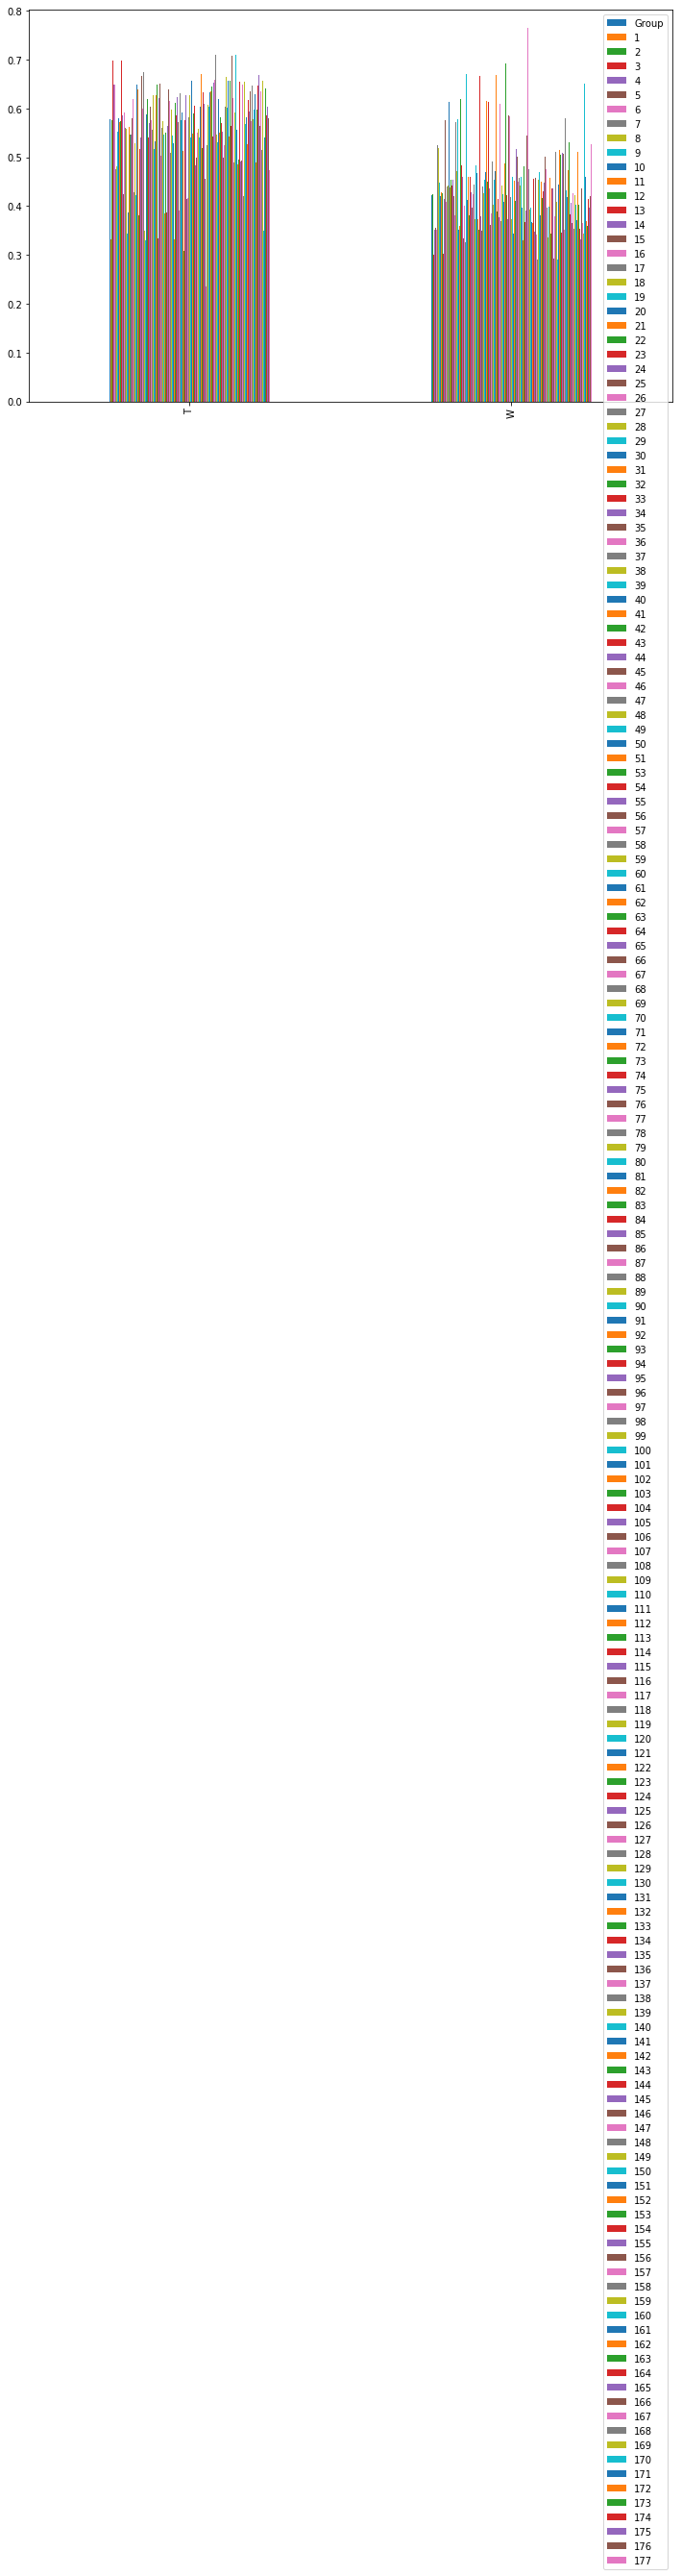

In [34]:
altscores = ahp.priority_table()
display(altscores.plot(kind="bar"))
display(altscores)

,T,W
Group,0.577751,0.422249
2,0.575389,0.424611
3,0.698863,0.301137
4,0.648973,0.351027
5,0.644230,0.355770
6,0.648310,0.351690
9,0.551912,0.448088
10,0.579100,0.420900
11,0.571869,0.428131
12,0.573704,0.426296


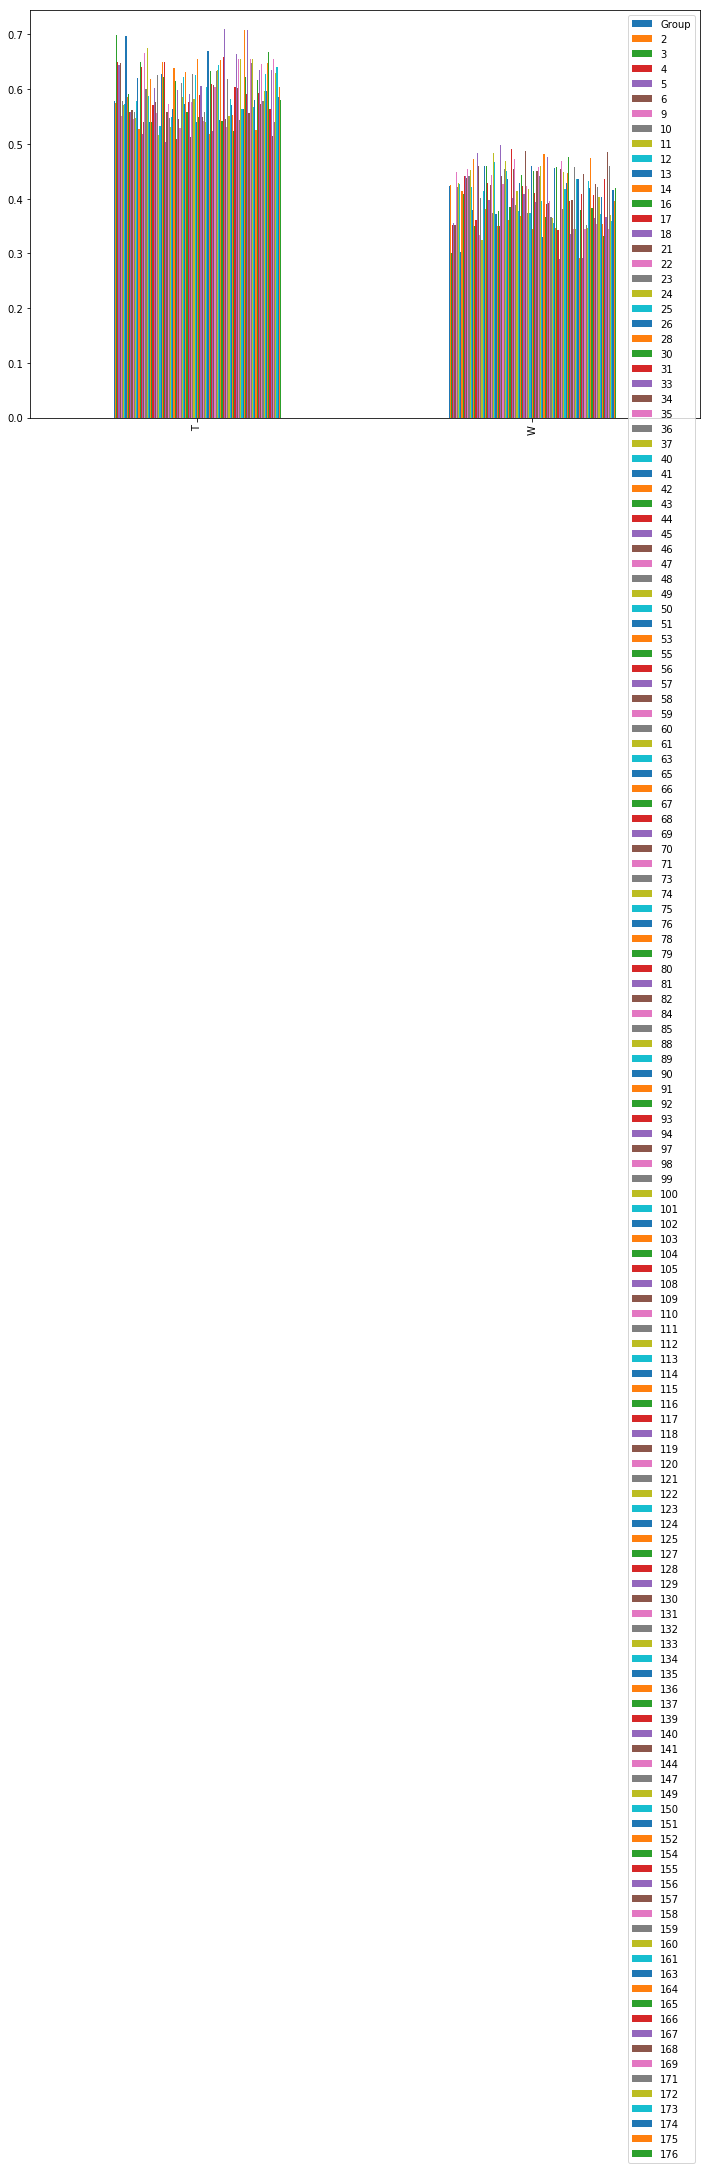

In [42]:
altstrans = altscores.transpose()
prefersT = altstrans.loc[altstrans['T'] > 0.5]
prefersT.transpose().plot(kind="bar")
display(prefersT)

In [46]:
display(max(prefersT['T']))
display(min(prefersT['T']))
display(min(altstrans['T']))

0.709603429196799

0.5027065116906486

0.23553242106280564

In [45]:
display(max(altstrans['W']))
display(min(altstrans['W']))

0.7644675789371944

0.2903965708032011

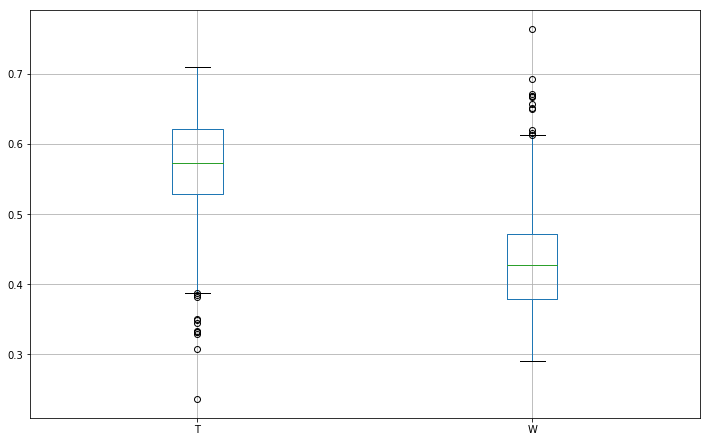

In [47]:
altstrans.boxplot()

## AHP Inconsistency calculations

,Group,1,2,3,4,5,6,7,8,9,...,168,169,170,171,172,173,174,175,176,177
Goal,0.010285,0.404945,0.336328,0.603861,0.336029,0.104643,0.341604,0.201473,0.483421,0.420089,...,0.324753,0.149179,0.143643,0.0,0.249807,0.491298,0.261297,0.259113,0.170742,0.180931


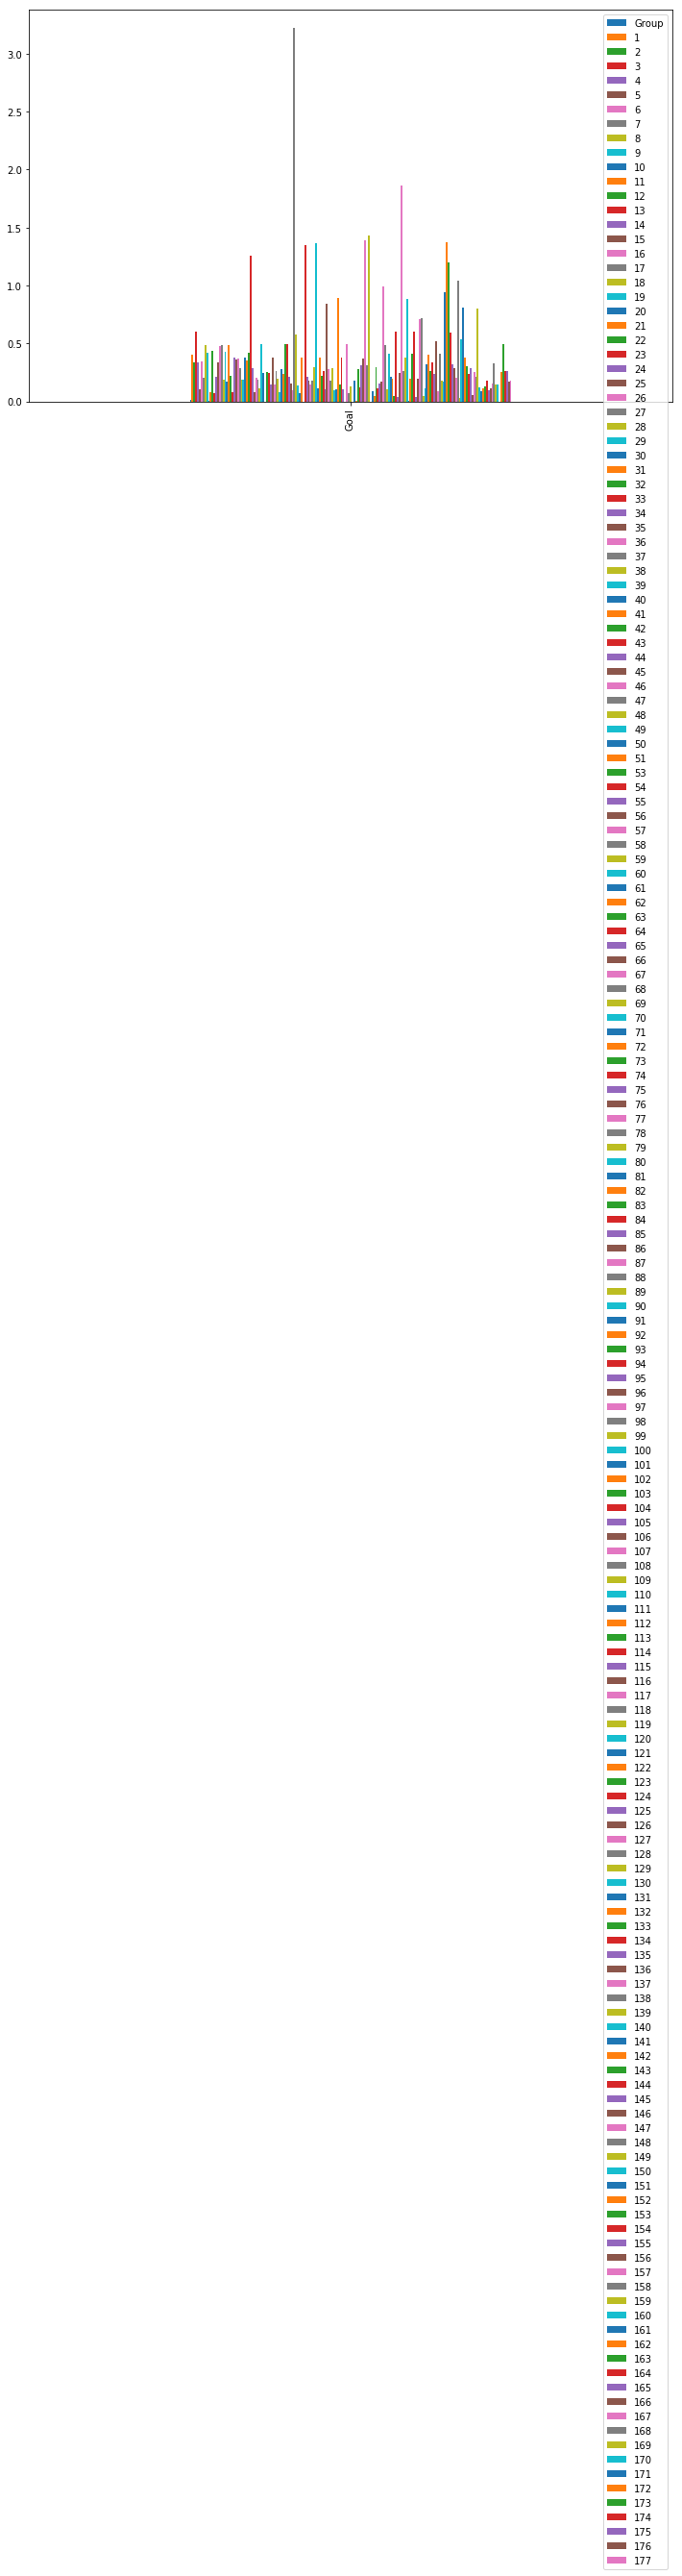

In [48]:
allincons = ahp.incond_std_table()
display(allincons)
allincons.plot(kind="bar")